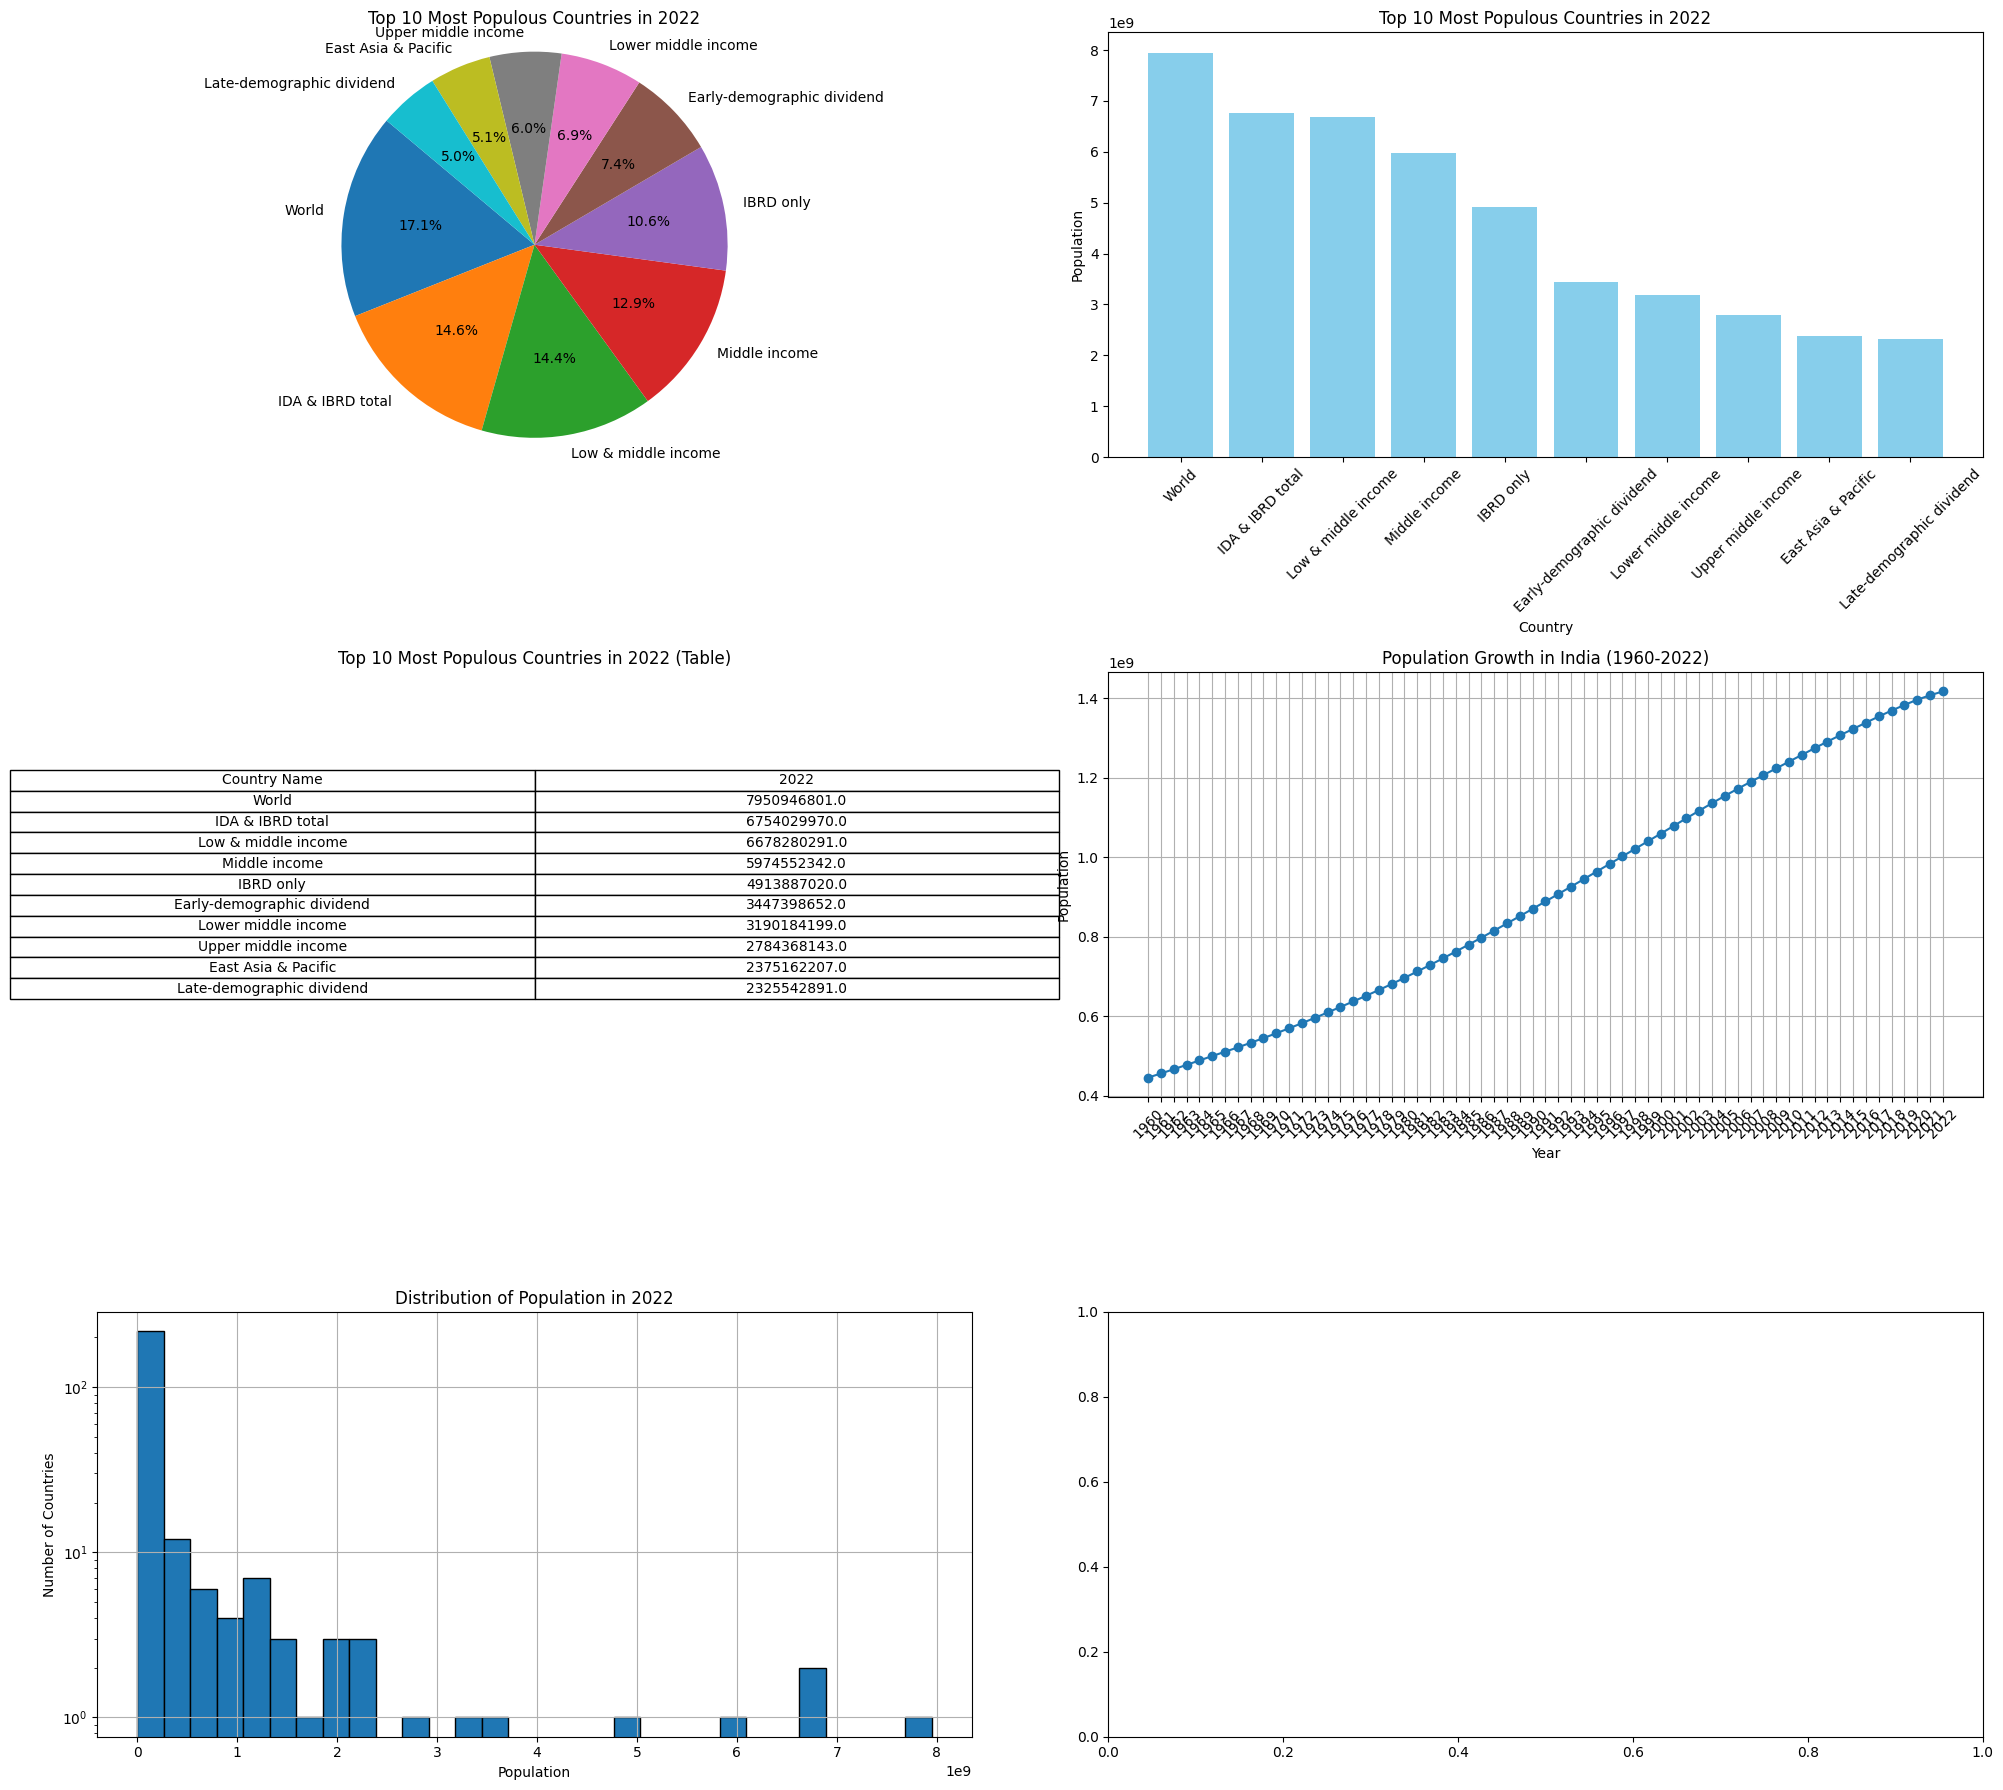

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

file_path = '/content/population_data.csv'
data = pd.read_csv(file_path, skiprows=4)

population_2022 = data[['Country Name', '2022']].dropna().sort_values(by='2022', ascending=False)
top_10_populous_countries = population_2022.head(10)

fig, axs = plt.subplots(3, 2, figsize=(20, 18))

axs[0, 0].pie(top_10_populous_countries['2022'], labels=top_10_populous_countries['Country Name'], autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Top 10 Most Populous Countries in 2022')
axs[0, 0].axis('equal')

axs[0, 1].bar(top_10_populous_countries['Country Name'], top_10_populous_countries['2022'], color='skyblue')
axs[0, 1].set_title('Top 10 Most Populous Countries in 2022')
axs[0, 1].set_xlabel('Country')
axs[0, 1].set_ylabel('Population')
axs[0, 1].tick_params(axis='x', rotation=45)

axs[1, 0].axis('tight')
axs[1, 0].axis('off')
table = axs[1, 0].table(cellText=top_10_populous_countries.values, colLabels=top_10_populous_countries.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
axs[1, 0].set_title('Top 10 Most Populous Countries in 2022 (Table)')

india_population = data[data['Country Name'] == 'India'].iloc[0, 4:-1].dropna().astype(float)
axs[1, 1].plot(india_population.index, india_population.values, marker='o', linestyle='-')
axs[1, 1].set_title('Population Growth in India (1960-2022)')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Population')
axs[1, 1].grid(True)
axs[1, 1].tick_params(axis='x', rotation=45)

axs[2, 0].hist(population_2022['2022'], bins=30, edgecolor='black')
axs[2, 0].set_title('Distribution of Population in 2022')
axs[2, 0].set_xlabel('Population')
axs[2, 0].set_ylabel('Number of Countries')
axs[2, 0].set_yscale('log')
axs[2, 0].grid(True)

def generate_live_data():
    return [random.randint(1, 100) for _ in range(20)]

xdata, ydata = [], []

def update(frame):
    xdata.append(frame)
    ydata.append(generate_live_data())
    axs[2, 1].clear()
    axs[2, 1].plot(xdata, ydata)
    axs[2, 1].set_title('Live Moving Chart')
    axs[2, 1].set_xlabel('Time')
    axs[2, 1].set_ylabel('Value')
    axs[2, 1].grid(True)

ani = animation.FuncAnimation(fig, update, frames=range(10), repeat=True)

plt.tight_layout()
plt.show()